# NMR Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sb
from numpy import polyfit
import scipy.constants as const

In [2]:
def linearfit(x, a, b):
    return a*x + b

## Calibration

In [3]:
datasub = pd.read_excel('NMR.xlsx', sheet_name='calibration')
datasub.head()

,B in mT,I in A
0,10.7,0.05
1,64.6,0.49
2,130.5,1.00
3,197.5,1.50
4,264.0,2.00


parameters: [101.1039784   48.45329583]


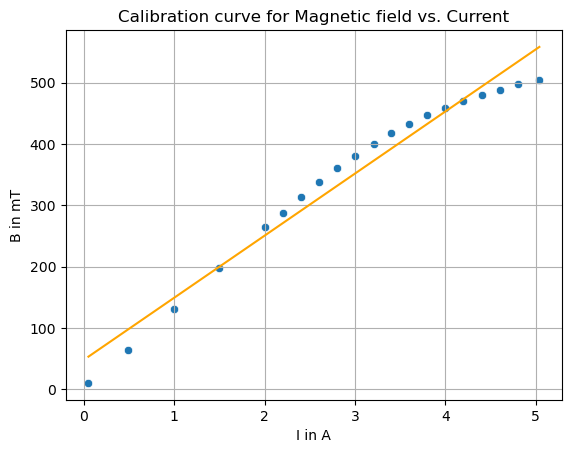

In [4]:
isub = datasub['I in A'].to_numpy()
bsub = datasub['B in mT'].to_numpy()

pfit = polyfit(isub, bsub, 1)  # 1 for lin, 7 for poly
dg = pfit.size-1
isubfit = np.linspace(isub.min(), isub.max(), 100)
print(f'parameters: {pfit}')
cal1, cal0 = pfit[0], pfit[1]
calfn = lambda x: sum([pfit.T[i]*x**(dg-i) for i in range(dg+1)])
bsubfit = calfn(isubfit)
sb.scatterplot(data=datasub, x='I in A', y='B in mT')
plt.plot(isubfit, bsubfit, 'orange')
plt.title('Calibration curve for Magnetic field vs. Current')
plt.grid()
plt.savefig('nmr_cal', dpi=600)
plt.show()

## 1. Glycerine

In [5]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='glycerine')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
delf1 = df1['del f FWHM'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals
display(xsub)

,I in A,freq in MHz,del X FWHM,Y,Y/rt2,del f FWHM,Unnamed: 6,x1,-240
0,3.11,17.5080,360,75.0,53.033009,0.080113,NaN,f1,19.622300
1,3.26,18.1430,400,59.6,42.143564,0.089014,NaN,x2,1.760000
2,3.38,18.5619,320,56.4,39.880822,0.071211,NaN,f2,19.676100
3,3.57,19.1758,400,48.0,33.941125,0.089014,NaN,del f/ del x,0.000223
4,3.74,19.6521,520,43.2,30.547013,0.115718,NaN,NaN,NaN


array([362.88666864, 378.0522654 , 390.18474281, 409.3944987 ,
       426.58217503])

slope=0.0333789777428949 and intercept=5.476200228982848


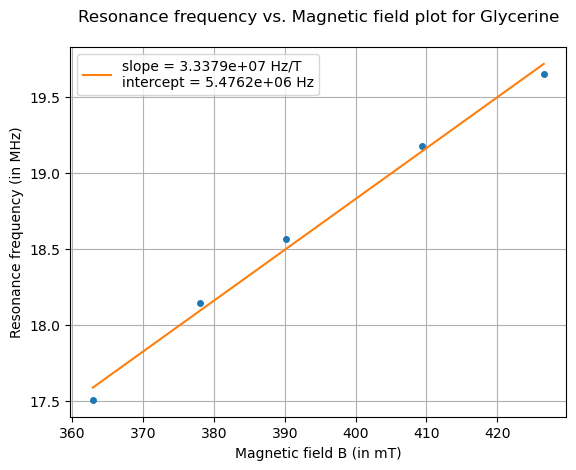

In [6]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]
print(f'slope={popt[0]} and intercept={popt[1]}')
gl1, gl0 = popt[0]*1e9, popt[1]*1e6
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit, label=
        f'slope = {gl1:.5} Hz/T\nintercept = {gl0:.5} Hz')
plt.title('Resonance frequency vs. Magnetic field plot for Glycerine\n')
plt.xlabel('Magnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)')
plt.legend(loc='best')
plt.grid()
plt.savefig('nmr_1', dpi=600)
plt.show()

## 2 Polystyrene

In [7]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='polystyrene')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
delf2 = df1['del f FWHM'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals
display(xsub)

,I in A,freq in MHz,del X FWHM,Y,Y/rt2,del f FWHM,Unnamed: 6,x1,-2.24
0,3.15,17.6405,640,56.0,39.597980,0.306326,NaN,f1,18.068200
1,3.30,18.0398,600,44.4,31.395541,0.287180,NaN,x2,-240.000000
2,3.45,18.6193,520,35.6,25.173001,0.248890,NaN,f2,18.182000
3,3.60,19.2226,640,31.2,22.061732,0.306326,NaN,del f/ del x,0.000479
4,3.75,19.6473,720,31.6,22.344574,0.344616,NaN,NaN,NaN


array([366.93082778, 382.09642454, 397.26202129, 412.42761805,
       427.59321481])

slope=0.03426439573630034 and intercept=5.02195689039543


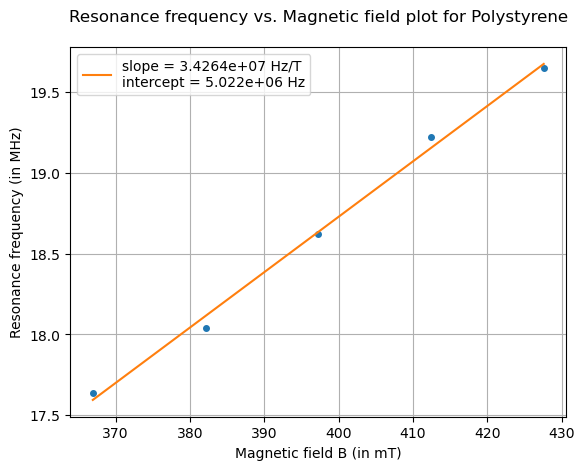

In [8]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]
print(f'slope={popt[0]} and intercept={popt[1]}')
pl1, pl0 = popt[0]*1e9, popt[1]*1e6
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit, label=
        f'slope = {pl1:.5} Hz/T\nintercept = {pl0:.5} Hz')
plt.title('Resonance frequency vs. Magnetic field plot for Polystyrene\n')
plt.xlabel('Magnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)')
plt.legend(loc='best')
plt.grid()
plt.savefig('nmr_2', dpi=600)
plt.show()

## 3 Polytetrafluoroethylene

In [9]:
df1 = pd.read_excel('NMR.xlsx', sheet_name='polytetrafluoroethylene')
display(df1.head())
Ivals = df1['I in A'].to_numpy()
fvals = df1['freq in MHz'].to_numpy()
delf3 = df1['del f FWHM'].to_numpy()
Bvals = calfn(Ivals)
xsub, ysub = Bvals, fvals
display(xsub)

,I in A,freq in MHz,del X FWHM in mV,Y in mV,Y/rt2,del f FWHM,Unnamed: 6,x1,-2.24,in V
0,3.25,16.9826,360,190.0,134.350288,15.21,NaN,f1,17.33930,NaN
1,3.40,17.3982,320,110.0,77.781746,13.52,NaN,x2,3.76000,in V
2,3.55,17.8879,440,81.0,57.275649,18.59,NaN,f2,17.59280,NaN
3,3.70,18.2681,560,68.4,48.366104,23.66,NaN,del f/ del x,0.04225,NaN
4,3.85,18.7505,440,51.2,36.203867,18.59,NaN,NaN,NaN,NaN


array([377.04122562, 392.20682238, 407.37241913, 422.53801589,
       437.70361265])

slope=0.029050620647295515 and intercept=6.023038389553612


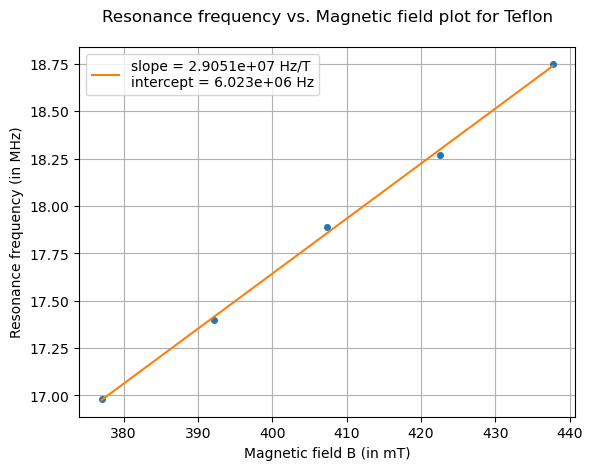

In [10]:
popt, pcov = curve_fit(linearfit, xsub, ysub, p0=[0.05, 2])
xsubfit = np.linspace(xsub.min(), xsub.max(), 100)
ysubfit = popt[0]*xsubfit + popt[1]
print(f'slope={popt[0]} and intercept={popt[1]}')
tf1, tf0 = popt[0]*1e9, popt[1]*1e6
plt.plot(xsub, ysub, 'o', ms=4)
plt.plot(xsubfit, ysubfit, label=
        f'slope = {tf1:.5} Hz/T\nintercept = {tf0:.5} Hz')
plt.title('Resonance frequency vs. Magnetic field plot for Teflon\n')
plt.xlabel('Magnetic field B (in mT)')
plt.ylabel('Resonance frequency (in MHz)')
plt.legend(loc='best')
plt.grid()
plt.savefig('nmr_3', dpi=600)
plt.show()

## Calculations

### g factor
$$g = \frac{h}{\mu_N} \frac{\nu}{B}$$

In [11]:
h = const.h
mu_n = 5.051e-27
print(f'h = {h}, mu_n = {mu_n}')

h = 6.62607015e-34, mu_n = 5.051e-27


In [12]:
g1 = (h/mu_n)*(gl1)
print(f'g factor for glycerine = {g1}.')
g2 = (h/mu_n)*(pl1)
print(f'g factor for polystyrene = {g2}.')
g3 = (h/mu_n)*(tf1)
print(f'g factor for teflon = {g3}.')

g factor for glycerine = 4.378765552558113.
g factor for polystyrene = 4.494917636034191.
g factor for teflon = 3.8109572423286178.


### Linewidth

In [13]:
lw1 = np.mean(delf1*1e6)
print(f'Linewidth for glycerine: {lw1:.5} Hz')
lw2 = np.mean(delf2*1e6)
print(f'Linewidth for polystyrene: {lw2:.5} Hz')
lw3 = np.mean(delf3*1e6)*1e-3
print(f'Linewidth for teflon: {lw3:.5} Hz')

Linewidth for glycerine: 8.9014e+04 Hz
Linewidth for polystyrene: 2.9867e+05 Hz
Linewidth for teflon: 1.7914e+04 Hz


## Error Analysis

### g factor for Hydrogen
$$g_{H} = \frac{g_{glycerine}+g_{polystyrene}}{2}$$

In [14]:
gHth = 5.5867
gH = (g1+g2)/2
err = abs(gHth-gH)*100/gHth
print(f'Theoretical value = {gHth}')
print(f'Calculated value = {gH}')
print(f'percentage error = {err} %')

Theoretical value = 5.5867
Calculated value = 4.436841594296151
percentage error = 20.582068228182095 %


### g factor for Fluorine
$$g_{F} = g_{teflon}$$

In [15]:
gFth = 5.2567
gF = g3
err = abs(gFth-gF)*100/gFth
print(f'Theoretical value = {gFth}')
print(f'Calculated value = {gF}')
print(f'percentage error = {err} %')

Theoretical value = 5.2567
Calculated value = 3.8109572423286178
percentage error = 27.50285840301677 %
